In [5]:
import pandas as pd
df = pd.read_csv('Dim hali price.csv')
df.head()


,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [7]:
df.shape

(7, 2)

In [8]:
df.tail(5)

,weight,price
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [9]:
df.describe()

,weight,price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [10]:
df.isnull().sum()

weight    0
price     0
dtype: int64

In [11]:
a = df['weight']
b = df['price']

In [12]:
import numpy as np
mean_a = np.mean(a)
mean_b = np.mean(b)

In [13]:
mean_a


np.float64(4.571428571428571)

In [14]:
mean_b


np.float64(47.142857142857146)

In [20]:
dev_a = a - mean_a
dev_b = b - mean_b

In [23]:
m = np.sum(dev_a * dev_b)/np.sum(dev_a ** 2)

In [24]:
m


np.float64(2.620967741935484)

In [25]:
c = mean_b - m * mean_a


In [26]:
c


np.float64(35.16129032258065)

In [57]:
#y = mx+c
(m * 6.50) + c


np.float64(52.197580645161295)

sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression() <br>


In [43]:
!pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
reg = LinearRegression()


In [46]:
reg.fit(df[['weight']],df[['price']])

LinearRegression()

In [47]:
reg.predict([[6]])

C:\Users\MINAR'S WORLD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [48]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Dim hali price')

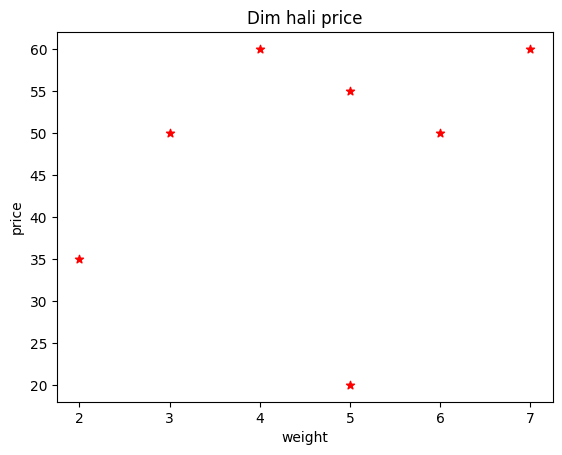

In [54]:
plt.scatter(df.weight,df.price,color ='red',marker = '*')
plt.xlabel('weight')
plt.ylabel('price')
plt.title('Dim hali price')

In [55]:
reg.predict(df[['weight']])

array([[40.40322581],
       [45.64516129],
       [48.26612903],
       [43.02419355],
       [50.88709677],
       [48.26612903],
       [53.50806452]])

In [58]:
df2 = df.copy()
df2.head()

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [66]:
df2['predicted price'] = reg.predict(df[['weight']])
df2 = df2.drop('predicted table', axis=1)


In [67]:
df2.head()

,weight,price,predicted price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [68]:
df2['residuals'] = df2['price'] - df2['predicted price']
df2.head()

,weight,price,predicted price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


In [69]:
reg.score(df[['weight']],df[['price']]) #r square values

0.09412315095348434

COST <br>

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
mse = mean_squared_error(df2[['price']],df2[['predicted price']])


In [76]:
mse


167.30990783410135

In [77]:
mae = mean_absolute_error(df2[['price']],df2[['predicted price']])


In [78]:
mae

9.87327188940092

In [79]:
reg.coef_

array([[2.62096774]])

In [80]:
reg.intercept_

array([35.16129032])

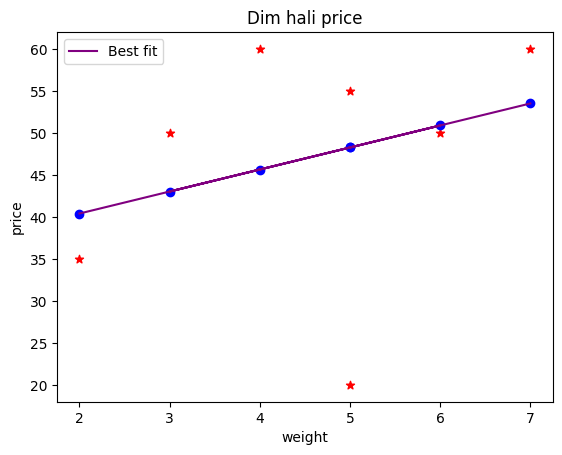

In [84]:
plt.scatter(df.weight,df.price,color ='red',marker = '*')
plt.plot(df.weight,df2['predicted price'],label = 'Best fit',color = 'purple')
plt.scatter(df.weight,df2['predicted price'],color = 'blue')
plt.xlabel('weight')
plt.ylabel('price')
plt.title('Dim hali price')

plt.legend()
plt.show()